In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset[['Age', 'EstimatedSalary']].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
X_train = sc.fit_transform(X_train)
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [8]:
X_test = sc.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
classifier =  GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)   # Our predicted values
print(y_test)   # Actual Values

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(ac)
print(cm)

0.9125
[[55  3]
 [ 4 18]]


In [18]:
# Note: We need to do
# !pip install empiricaldist
# !pip install statadict
# before running this example

In [22]:
import empiricaldist
from statadict import parse_stata_dict

In [23]:
dict_file = 'GSS.dct'
data_file = "GSS.dat.gz"

In [24]:
from statadict import parse_stata_dict
stata_dict = parse_stata_dict(dict_file)

In [25]:
import gzip
fp = gzip.open(data_file)

In [26]:
import pandas as pd
gss = pd.read_fwf(fp, names = stata_dict.names, colspecs=stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0  1972    1   23    16       2       1      0  18951.0
1  1972    2   70    10       1       1      0  24366.0
2  1972    3   48    12       2       1      0  24366.0
3  1972    4   27    17       2       1      0  30458.0
4  1972    5   61    12       2       1      0  50763.0


In [27]:
print(gss['EDUC'].value_counts().sort_index())

0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: EDUC, dtype: int64


In [28]:
#The values 98 and 99 are special codes for 'Don't Know' and  "No Answer". We'll use replace to replace thses codes with NaN.


In [29]:
import numpy as np

In [30]:
educ = gss['EDUC'].replace([98,99], np.nan)

In [31]:
#Visualise it
import matplotlib.pyplot as plt


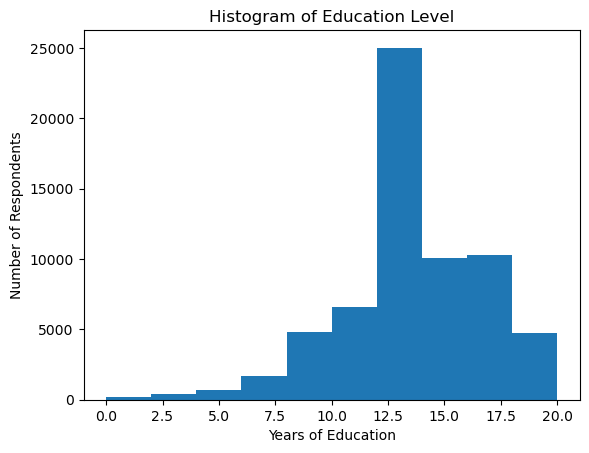

In [32]:
educ.hist(grid = False)
plt.xlabel("Years of Education")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Education Level")
plt.show()

In [33]:
from empiricaldist import Pmf

In [36]:
pmf_educ = Pmf.from_seq(educ, normalize = False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
0.0    165
1.0     47
2.0    152
Name: EDUC, dtype: int64
18.0    2384
19.0     920
20.0    1439
Name: EDUC, dtype: int64
1439


In [38]:
pmf_educ_norm = Pmf.from_seq(educ, normalize = True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12]) # Sample for 12 years of experience

0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: EDUC, dtype: float64
0.30420656899299164


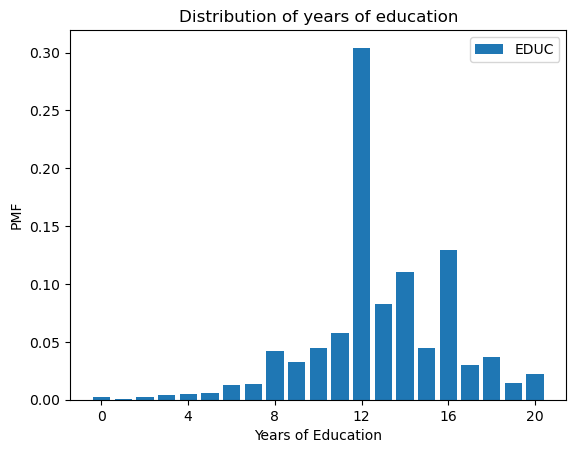

In [39]:
pmf_educ_norm.bar(label = 'EDUC')
plt.xlabel("Years of Education")
plt.xticks(range(0,21,4))
plt.ylabel("PMF")
plt.title("Distribution of years of education")
plt.legend()
plt.show()

In [40]:
#Now CDF
from empiricaldist import Cdf

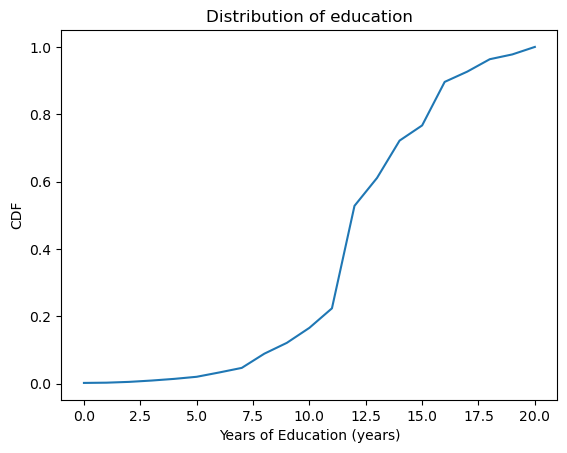

In [41]:
educ = gss['EDUC'].replace([98,99], np.nan)
cdf_educ = Cdf.from_seq(educ)
cdf_educ.plot()
plt.xlabel("Years of Education (years)")
plt.ylabel("CDF")
plt.title("Distribution of education")
plt.show()

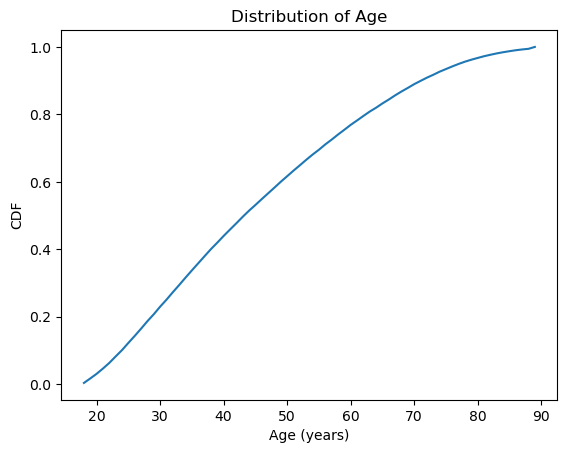

In [42]:
# CDF for Age
age = gss['AGE'].replace([98,99], np.nan)
cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel("Age (years)")
plt.ylabel("CDF")
plt.title("Distribution of Age")
plt.show()

In [43]:
# We can also obtain the cumulative probability up to a certain point, eg, age = 51

q = 51
p = cdf_age(q)
print(q)

# About 63% of the respondants are 51 yrs old or younger

51


In [44]:
#Inversely find the Age at a certain value of cumulative probability

In [45]:
p1 = 0.25
q1 = cdf_age.inverse(p1)
print(q1)
#We can now use 75 percentile to find IQA

31.0


In [46]:
p3 = 0.75
q3 = cdf_age.inverse(p3)
print(q3)
print(q3-q1)


59.0
28.0


Q1: 31.0, Q3: 59.0


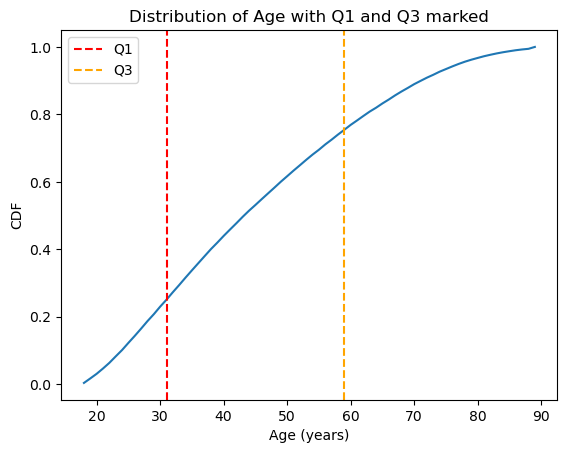

In [47]:
print(f"Q1: {q1}, Q3: {q3}")
cdf_age = empiricaldist.Cdf.from_seq(age)
cdf_values = cdf_age.values
data_points = cdf_age.index

plt.plot(data_points, cdf_values)
plt.axvline(x=q1, color='red', ls="--", label="Q1")
plt.axvline(x=q3, color='orange', ls="--", label="Q3")

plt.xlabel("Age (years)")
plt.ylabel("CDF")
plt.title("Distribution of Age with Q1 and Q3 marked")
plt.legend()
plt.show()

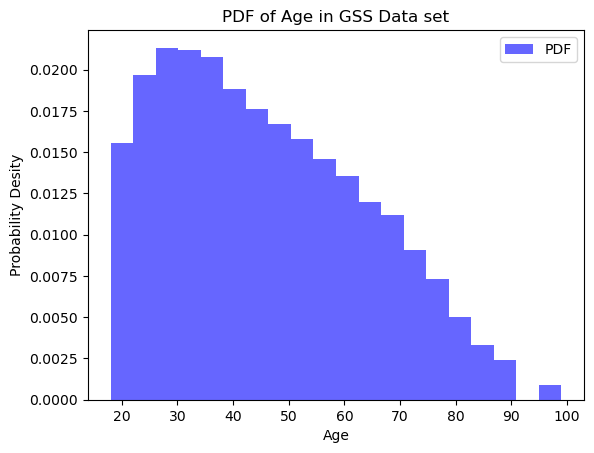

In [48]:
# KDE
age_data = gss['AGE']

# Create a histogram to visualize the PDF
plt.hist(age_data, bins = 20, density = True, alpha = 0.6, color = 'b', label = 'PDF')
plt.xlabel("Age")
plt.ylabel("Probability Desity")
plt.title("PDF of Age in GSS Data set")
plt.legend()
plt.show()

In [50]:
# Corresponding PMF

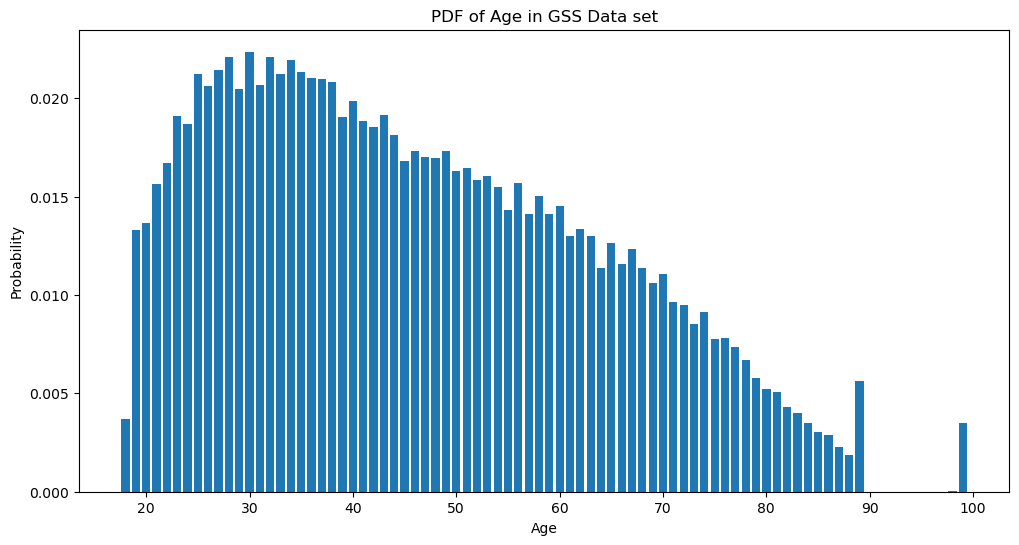

In [52]:
pmf = age_data.value_counts(normalize = True).sort_index()

# Create a bar plot of the PMf
plt.figure(figsize = (12,6))
plt.bar(pmf.index, pmf.values)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title("PDF of Age in GSS Data set")
plt.show()